In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/sample_data/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<Axes: xlabel='Medu'>

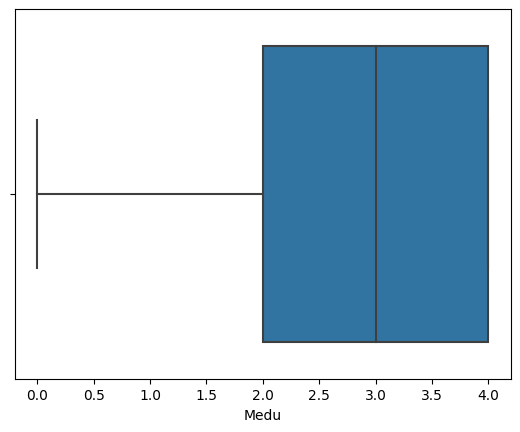

In [ ]:
sns.boxplot(x=df['Medu'])

In [ ]:
q1= df['Medu'].quantile(0.25)
q3= df['Medu'].quantile(0.75)
iqr=q3-q1
threshold=1.5
lower_fence= q1-threshold*iqr
upper_fence= q3+threshold*iqr
df= df[(df['Medu']>lower_fence)&(df['Medu']<upper_fence)]

<function matplotlib.pyplot.show(close=None, block=None)>

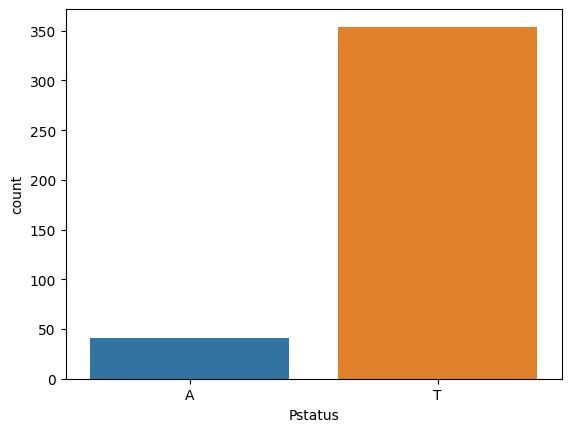

In [ ]:
sns.countplot(x='Pstatus', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

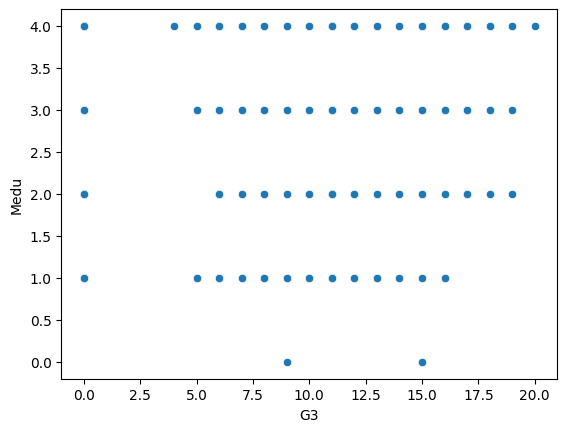

In [ ]:
sns.scatterplot(data=df, x = 'G3', y = 'Medu')
plt.show

<Axes: xlabel='G3', ylabel='Count'>

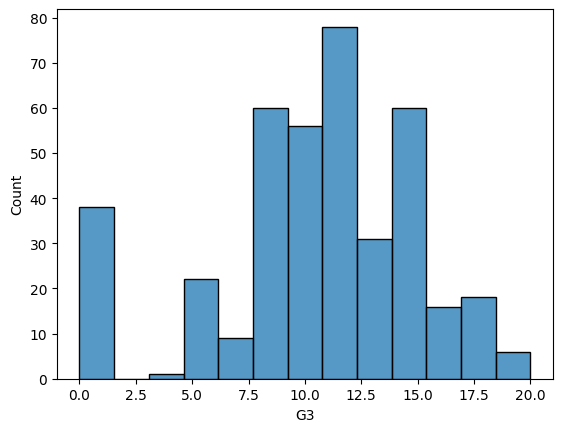

In [ ]:
sns.histplot(data = df, x = 'G3')

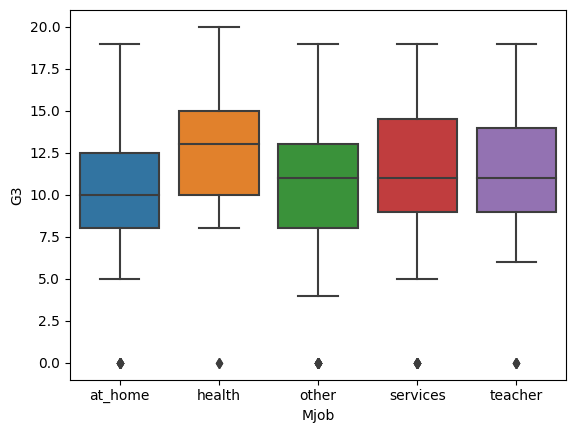

In [ ]:
sns.boxplot(data = df, x = 'Mjob', y='G3')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

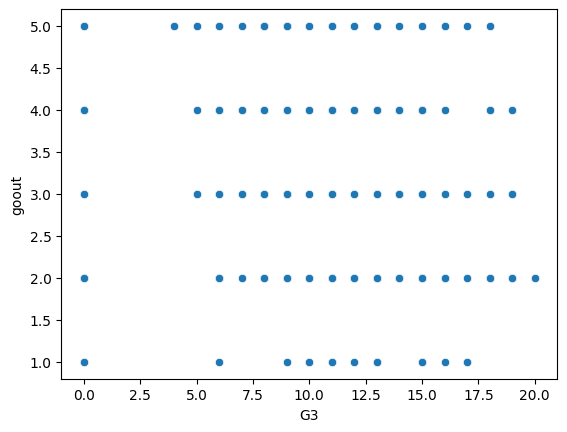

In [ ]:
sns.scatterplot(data=df, x = 'G3', y = 'goout')
plt.show

In [ ]:
finalgrades_mod1=df [['Medu','G3']]
X=finalgrades_mod1.drop('G3',axis=1)

#Stamdarzied the feature
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
y= finalgrades_mod1['G3']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                    random_state=42)

#Initialize the logistic regression model
logreg_mod1 = LogisticRegression()

#Fit the model to the training data
logreg_mod1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predictions on the test data
y_pred= logreg_mod1.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy:{accuracy}')
#calculating are under receiver operating characteristic curve
y_pred_prob = logreg_mod1.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

accuracy:0.08403361344537816


ValueError: ignored

In [ ]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod1.
coef_[0]})
print(coef_df)

  Features  Coefficient
0     Medu    -0.482114


In [ ]:
numeric_var = ['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'G3']
scaler = StandardScaler()
df[numeric_var] = scaler.fit_transform(df[numeric_var])

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,1.023046,U,GT3,A,1.143856,1.360371,at_home,teacher,...,0.062194,-0.236010,4,1,1,3,6,5,6,-0.964934
1,GP,F,0.238380,U,GT3,T,-1.600009,-1.399970,at_home,other,...,1.178860,-0.236010,3,1,1,3,4,5,5,-0.964934
2,GP,F,-1.330954,U,LE3,T,-1.600009,-1.399970,at_home,other,...,0.062194,-0.236010,2,2,3,3,10,7,8,-0.090739
3,GP,F,-1.330954,U,GT3,T,1.143856,-0.479857,health,services,...,-1.054472,-1.238419,2,1,1,5,2,15,14,1.002004
4,GP,F,-0.546287,U,GT3,T,0.229234,0.440257,other,other,...,0.062194,-0.236010,2,1,2,5,4,6,10,-0.090739


In [ ]:
diamonds_mod1 = df[['age','Medu', 'Fedu', 'famrel', 'freetime','goout','Dalc','Walc','health','traveltime','studytime','failures','health', 'G3']]
X = diamonds_mod1.drop('G3', axis=1)
y = diamonds_mod1['G3']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
13
# Evaluate the model
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.11975971005900743
Adjusted R-squared: -0.05628834792919091
Mean squared error: 0.862101478659008


In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

       Feature  Coefficient
0          age    -0.061365
1         Medu     0.161240
2         Fedu    -0.053059
3       famrel     0.074079
4     freetime     0.047624
5        goout    -0.109944
6         Dalc    -0.007859
7         Walc     0.063003
8       health    -0.018092
9   traveltime    -0.076908
10   studytime     0.107828
11    failures    -0.423510
12      health    -0.018092


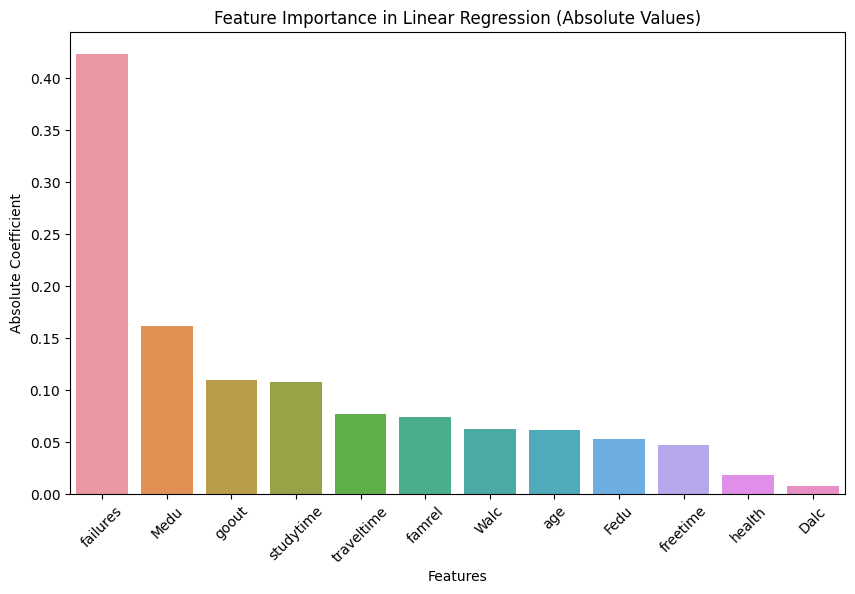

In [ ]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
# Reset index to use column names as a variable for plotting
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45) # Rotates labels to 45 degrees
plt.show()

In [ ]:
# Creating second model
X1 = df.drop('G1', axis=1)
y = df['G1']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

R-squared: 0.1329102190938336
Adjusted R-squared: -0.04050773708739963
Mean squared error: 11.855552825554401


In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
# Display the DataFrame
print(coef_df)

       Feature  Coefficient
0          age     0.244480
1         Medu     0.388983
2         Fedu     0.213513
3       famrel     0.002474
4     freetime     0.338610
5        goout    -0.427419
6         Dalc    -0.048907
7         Walc     0.029985
8       health    -0.037772
9   traveltime     0.035774
10   studytime     0.604859
11    failures    -1.257840
12      health    -0.037772


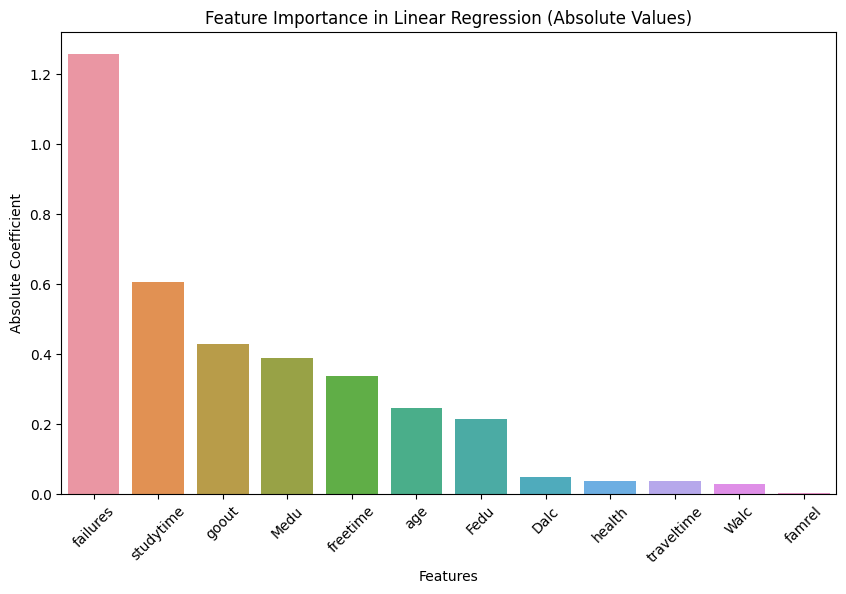

In [ ]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
# Reset index to use column names as a variable for plotting
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.ylabel('Absolute Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45) # Rotates labels to 45 degrees
plt.show()